/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.2080 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0854 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0650 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0552 - acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0481 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0422 - acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0372 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0333 - acc: 0.9897
Epoch 9/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0321 - acc: 0.9898
Epoch 10/10
10000/10000 [==============================] - 1s 130us/step
Testing a

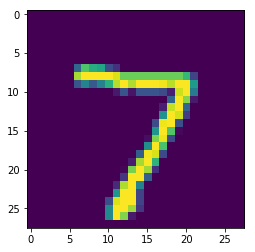

The Predicted Testing image is =7


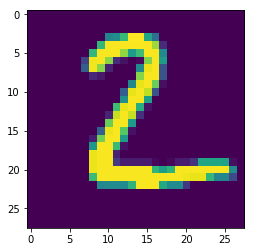

The Predicted Testing image is =2


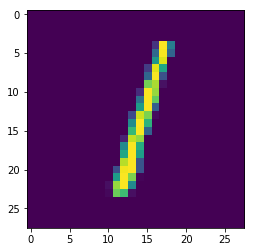

The Predicted Testing image is =1


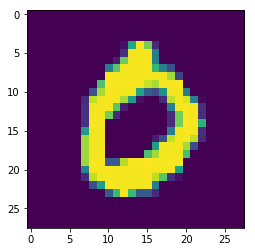

The Predicted Testing image is =0


In [8]:
#reference https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
# reference https://elitedatascience.com/keras-tutorial-deep-learning-in-python

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import numpy as np


def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
  
  
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check image shape
X_train[0].shape

#normalization values between 0 and 1
#X_train = X_train / 255
#X_test = X_test / 255

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#one-hot encode target column which is equal to generate_t in program 5
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1) #epochs  = iterations(Nit)

# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)
 
ytested = model.predict_classes(X_test)
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (ytested[i]))


In [0]:
3+4

In [0]:
score

[0.026925411104456, 0.9924]

In [0]:
score[1] * 100

99.27

In [0]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 5. Preprocess input data
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test /255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`


ValueError: ignored

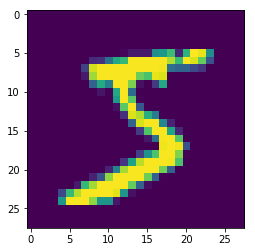

In [0]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])
#check image shape
X_train[0].shape

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

#X_train = X_train.reshape(60000,28,28,1)
#X_test = X_test.reshape(10000,28,28,1)
#X_train = X_train.reshape((-1, 1, 100, 1))
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

#predict first 4 images in the test set
model.predict(X_test[:4])

#actual results for first 4 images in test set
y_test[:4]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 423us/step - loss: 9.5803 - acc: 0.4042 - val_loss: 8.4370 - val_acc: 0.4761
Epoch 2/3
60000/60000 [==============================] - 18s 303us/step - loss: 7.7504 - acc: 0.5184 - val_loss: 7.2762 - val_acc: 0.5483
Epoch 3/3
60000/60000 [==============================] - 18s 304us/step - loss: 7.5434 - acc: 0.5317 - val_loss: 7.5443 - val_acc: 0.5316


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)